# Machine learning regression with applications to damage homogenization

In this tuorial, regression function in form of machinbe learning models are fit to noisy data sets, either created artificially or resulting from finite element simultions.

Author: Alexander Hartmaier</br>
Institution: ICAMS, Ruhr-Universität Bochum, Germany</br>
Date: March 2021

This work is licensed under a Creative 
Commons Attribution-NonCommercial-ShareAlike 4.0 International License
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">(CC-BY-NC-SA)</a>
 <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
<img alt="Creative Commons License" style="border-width:0;max-heigt:9px;height:100%;" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>

## 1. Machine learning regression of noisy sine-function

Artificial data is created by adding some noise to the trigonometric sine function. The following machine learning methods are trained on this data:

* Support Vector Regression (SVR)
* Decision Tree Regression (DTR)
* Random Forest Regression (RFR)

### Tasks:
Change the so-called meta parameters of the machine learning methods that control their training behavior and observe the resulting changes in the standard deviations. Can you find optimal parameters?
1. Modify the maximum depth of the decision trees for DTR and RFR
2. Modify the values of "C" and "gamma" for the SVR
3. Change the number of trees ("n_estomators") in the interval [1,...,1000] 

Change the noise from 'Outliers' (case 1) to 'standard errors' (case 2) and observe how the performance of the methods changes.

Example adapted from the scikit-learn.platform, see https://scikit-learn.org/stable/

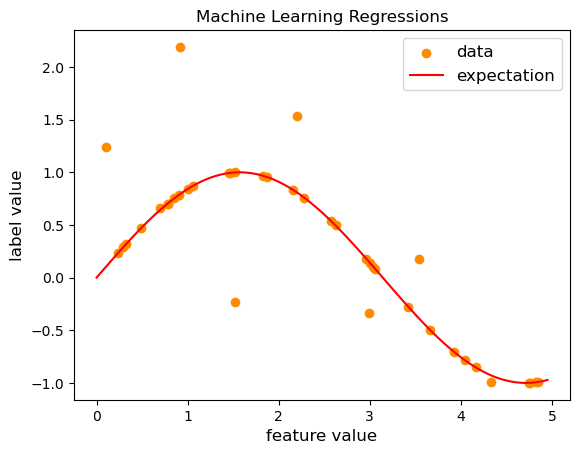

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


# #############################################################################
# Generate sample data
N = 40
np.random.seed(42)
X = np.sort(5 * np.random.rand(N, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Generate test data
Xtest = 5 * np.arange(0,1,0.01)
Xtest1 = Xtest.reshape(100,1)

# #############################################################################
# Add noise to targets
# case 1: 'Outliers'
y[::5] += 3 * (0.5 - np.random.rand(8))

# case 2: standard errors 
#y += 0.5 * np.random.randn(N)

# calculate expectation for plotting and error estimation
y_expect = np.sin(Xtest)

# Look at the results
lw = 2
fs = 12
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(Xtest, y_expect, color='red', label='expectation')
plt.xlabel('feature value',fontsize=fs)
plt.ylabel('label value',fontsize=fs)
plt.title('Machine Learning Regressions')
plt.legend(fontsize=fs)
#plt.savefig('regr-fct.pdf', dpi=150)
plt.show()

Standard deviation
DTR:  0.27114778245606014


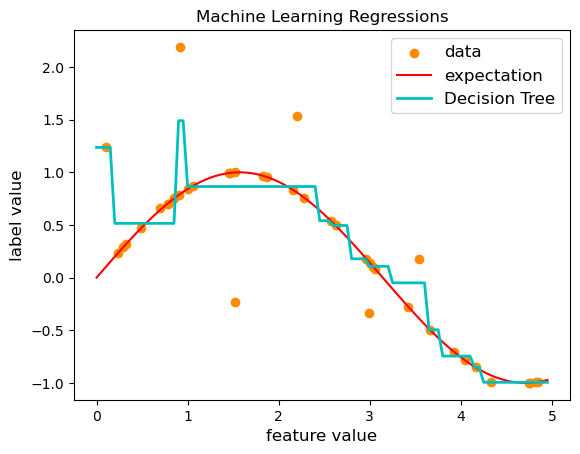

In [2]:
# #############################################################################
# Train Machine Learning Regressors
# #############################################################################

# Decision Tree Regression
regr_dtr = tree.DecisionTreeRegressor(max_depth=4)
regr_dtr.fit(X, y)
y_dtr = regr_dtr.predict(Xtest1)

# #############################################################################
# Analyze and visualize results
# #############################################################################
# Calculate error
chi2_dtr = np.std(y_dtr - y_expect)
print('Standard deviation')
print('DTR: ',chi2_dtr)

# Look at the results
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(Xtest, y_expect, color='red', label='expectation')
plt.plot(Xtest, y_dtr, color='c', lw=lw, label='Decision Tree')
plt.xlabel('feature value',fontsize=fs)
plt.ylabel('label value',fontsize=fs)
plt.title('Machine Learning Regressions')
plt.legend(fontsize=fs)
#plt.savefig('regr-fct.pdf', dpi=150)
plt.show()

Standard deviation
RFR:  0.21822329950896394

Number of estimators (decision trees):
20 

depth and number of leaves for first 5 decision trees after training:
8 22
8 25
8 27
8 25
10 26


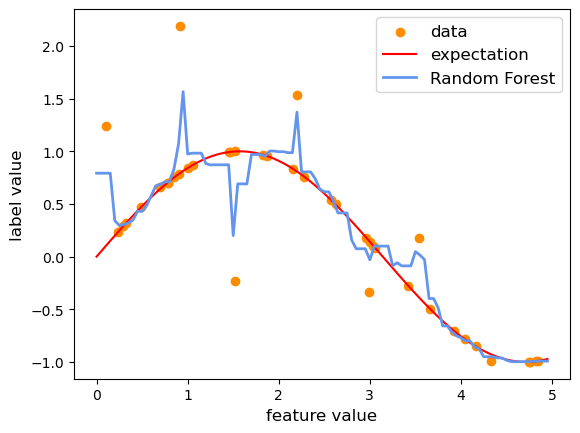

In [3]:
# Random Forest Regression
Nest = 20
regr_rf = RandomForestRegressor(n_estimators=Nest, max_depth=10, random_state=2)
regr_rf.fit(X, y)
y_rf = regr_rf.predict(Xtest1)

#calculte error
chi2_rf = np.std(y_rf - y_expect)
print('Standard deviation')
print('RFR: ',chi2_rf)

print('\nNumber of estimators (decision trees):')
print(Nest,'\n')
print('depth and number of leaves for first 5 decision trees after training:')
for dt in regr_rf.estimators_[0:np.minimum(5, Nest)]:
    print(dt.get_depth(), dt.get_n_leaves())

# Look at the results
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(Xtest, y_expect, color='red', label='expectation')
plt.plot(Xtest, y_rf, color='cornflowerblue', lw=lw, label='Random Forest')
plt.xlabel('feature value',fontsize=fs)
plt.ylabel('label value',fontsize=fs)
#plt.title('Machine Learning Regressions')
plt.legend(fontsize=fs)
plt.savefig('regr-rfr.pdf', dpi=150)
plt.show()

Standard deviation
SVR:  0.07895659990025644


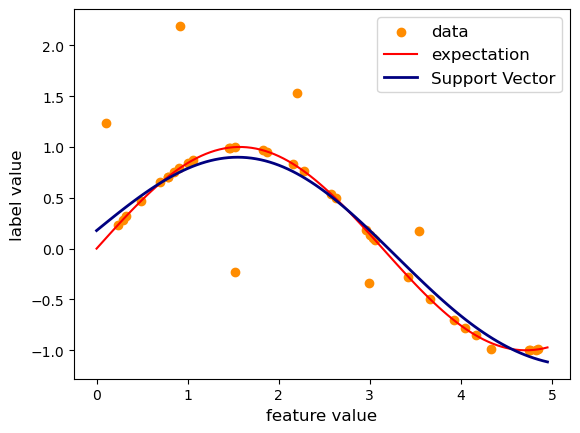

In [4]:
# Support Vector Regression
svr_rbf = SVR(kernel='rbf', C=10., gamma=0.1)
svr_rbf.fit(X, y)
y_rbf = svr_rbf.predict(Xtest1)

#calculate error
chi2_svr = np.std(y_rbf - y_expect)
print('Standard deviation')
print('SVR: ',chi2_svr)

# Look at the results
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(Xtest, y_expect, color='red', label='expectation')
plt.plot(Xtest, y_rbf, color='navy', lw=lw, label='Support Vector')
plt.xlabel('feature value',fontsize=fs)
plt.ylabel('label value',fontsize=fs)
#plt.title('Machine Learning Regressions')
plt.legend(fontsize=fs)
plt.savefig('regr-svr.pdf', dpi=150)
plt.show()

Standard deviation
ANN:  0.7103763476385121


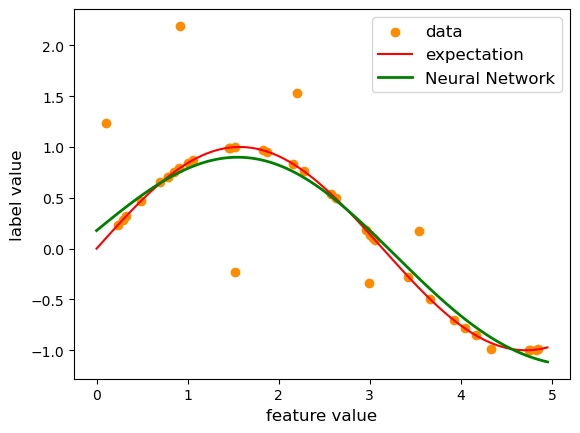

In [5]:
# Neural Network
regr_ann = MLPRegressor(hidden_layer_sizes=[5], random_state=1, max_iter=500)
regr_ann.fit(X, y)
y_ann = regr_ann.predict(Xtest1)

#calculate error
chi2_ann = np.std(y_ann - y_expect)
print('Standard deviation')
print('ANN: ',chi2_ann)

# Look at the results
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(Xtest, y_expect, color='red', label='expectation')
plt.plot(Xtest, y_rbf, color='g', lw=lw, label='Neural Network')
plt.xlabel('feature value',fontsize=fs)
plt.ylabel('label value',fontsize=fs)
#plt.title('Machine Learning Regressions')
plt.legend(fontsize=fs)
plt.savefig('regr-ann.pdf', dpi=150)
plt.show()

Standard deviations
SVR:  0.07895659990025644
DTR:  0.27114778245606014
RFR:  0.21822329950896394


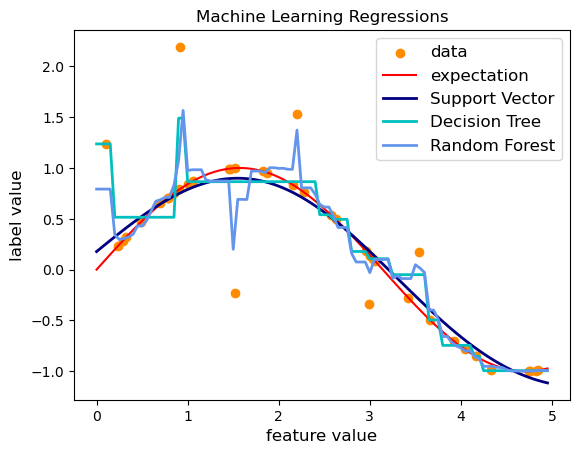

In [6]:
#calculate error
print('Standard deviations')
print('SVR: ',chi2_svr)
print('DTR: ',chi2_dtr)
print('RFR: ',chi2_rf)

# Look at the results
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(Xtest, y_expect, color='red', label='expectation')
plt.plot(Xtest, y_rbf, color='navy', lw=lw, label='Support Vector')
plt.plot(Xtest, y_dtr, color='c', lw=lw, label='Decision Tree')
plt.plot(Xtest, y_rf, color='cornflowerblue', lw=lw, label='Random Forest')
plt.xlabel('feature value',fontsize=fs)
plt.ylabel('label value',fontsize=fs)
plt.title('Machine Learning Regressions')
plt.legend(fontsize=fs)
plt.show()

## 2. Machine learning regression for evolution of damage value 

Data of the damage evolution in a simple ploycrystalline microstructure has been generated by crystal plasticiy finite element simulations. Random Forest Regressor (RFR) is trained by this data and the results are analyzed.


In [7]:
# Loading data, training and testing RFR
import pandas as pd
from sklearn.model_selection import train_test_split

print('\n ----------- Random Forest Regression ---------- \n')

#loading data with pandas'
DataNames = ['D[-]','D_dot[1/s]','p[-]','p_dot[1/s]','Mises[MPa]','Hydro[MPa]','teq[-]','eeq[-]','V[mm^3]','Sig_tri[-]','LoadState']
AllData = totdf = pd.read_csv('data/merged_data.csv',header=1,names=DataNames)

#chosing wich paramters to use as input (features) for training
InNames = ['D[-]','p_dot[1/s]','Mises[MPa]','Hydro[MPa]']
input_data = AllData[InNames]
output_data = np.absolute(AllData['D_dot[1/s]'])
loading_states = AllData['LoadState']

#Preprocessing data
rndstate = 40
#Splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, random_state=rndstate)

#define random forest regressor parameters
forest = ensemble.RandomForestRegressor( n_estimators=100, criterion='squared_error', max_depth=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,n_jobs=-1, bootstrap=True, 
                                        oob_score=False, random_state=rndstate, verbose=0, warm_start=False)

#fit training data
print('training model\n')
forest.fit(X_train, y_train)

print('Number of estimators (decision trees):')
print(forest.n_estimators,'\n')
print('depth and number of leaves for first 5 decision trees after training:')
for dt in forest.estimators_[0:5]:
    print(dt.get_depth(), dt.get_n_leaves())

#compute traning and test scores
train_score = 100*forest.score(X_train, y_train)
test_score = 100*forest.score(X_test, y_test)
print("\nTraining set score: {} %".format(train_score))
print("Test set score: {} %".format(test_score))


 ----------- Random Forest Regression ---------- 

training model

Number of estimators (decision trees):
100 

depth and number of leaves for first 5 decision trees after training:
30 2212
33 2212
38 2237
35 2214
33 2207

Training set score: 92.53989482054699 %
Test set score: 99.63810999165055 %


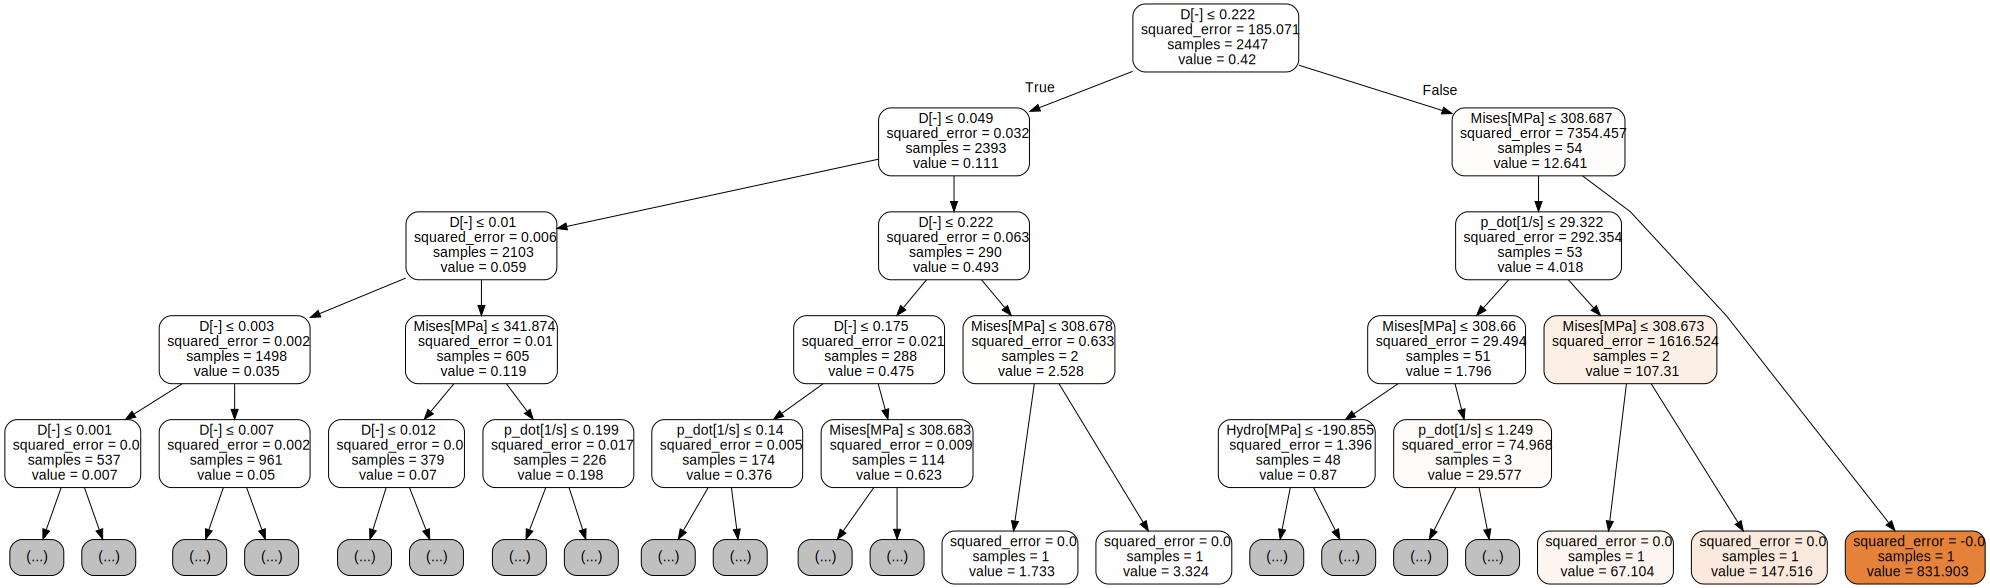

In [8]:
import graphviz 

dot_data = tree.export_graphviz(forest.estimators_[0], out_file=None, 
                            max_depth=4, feature_names = InNames,
                            filled=True, rounded=True,  
                            leaves_parallel=True,
                            special_characters=True)

graph = graphviz.Source(dot_data) 
graph

## 2.2. Calculate results of Chaboche damage model for comparison


Definition of damage rate:
\begin{equation} \dot{D} = \left( \frac{Y}{S} \right)^s \, \dot{p} \end{equation}
with
\begin{equation} 
Y = \frac{\sigma_{eq}^2}{2 E \left(1-D\right)^2} 
\left[ \frac{2}{3}(1+\nu) +3 (1-2\nu) \left( \frac{\sigma_{hyd}^2}{\sigma_{eq}^2} \right)^2  \right]
\end{equation}

(see for example J.L. Chaboche. Continuum Damage Mechanics: Part II—Damage Growth, Crack Initiation, and Crack Growth, J. Appl. Mech 55 (1988) 65-72  doi:10.1115/1.3173662 )


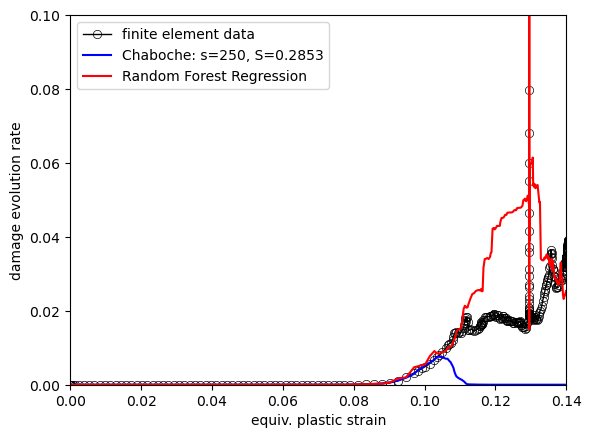

In [9]:
#Read data for uniaxial loading state as basis for Chaboche damage model
ChaData = totdf = pd.read_csv('data/examples_Tx_forAnalytical_1.txt',sep='\t',header=1,names=DataNames)

#Define aterial parameters according to finite element model of damage evolution within the microstructure
E = 228960.0 #Youngs modulus [MPa] 
nu = 0.27 #Poisson ratio

#input data
sigmaEq = ChaData['Mises[MPa]'] #[MPa]
sigmaHyd = ChaData['Hydro[MPa]'] #[MPa]
peeq = ChaData['p[-]']
p_dot = abs(ChaData['p_dot[1/s]']) #[1/s]
Damage = ChaData['D[-]'] #[-]
DRate_num = ChaData['D_dot[1/s]']

# calculate damage energy release rate
Y1 = np.divide( np.power(sigmaEq,2), (2.0*E*np.power(np.subtract(1,Damage),2)) )
Y2 = np.add( 2.0/3.0*(1.0+nu), np.multiply(3.0*(1.0-2.0*nu), np.power( np.divide(sigmaHyd,sigmaEq) ,2) ) )
Y = np.multiply(Y1,Y2)

#Damage rate according to Chaboche in [1/s]
s = 250
S = 0.2853 # max(Y) = 0.282752234031715   #S=0.2853, s=250
DRate = np.multiply( np.power(np.divide(Y,S),s), p_dot)

#Damage rate accoring to RFR
pred_data=ChaData[InNames]
DRate_RFR = forest.predict(pred_data)

#plot results of RFR and Chaboche model
plt.plot(peeq, DRate_num,'.-k',linewidth=1., markersize=12, markeredgewidth=0.5,markerfacecolor='none', label=r'finite element data')
plt.plot(peeq, DRate,'-b',linewidth=1.5, label=r'Chaboche: s=%s, S=%s'%(s,S))
plt.plot(peeq,DRate_RFR,'-r',linewidth=1.5, label=r'Random Forest Regression')
plt.xlabel('equiv. plastic strain')
plt.ylabel('damage evolution rate')
plt.legend(loc='upper left')
plt.axis([0, 0.14, 0, 0.1])
plt.show()

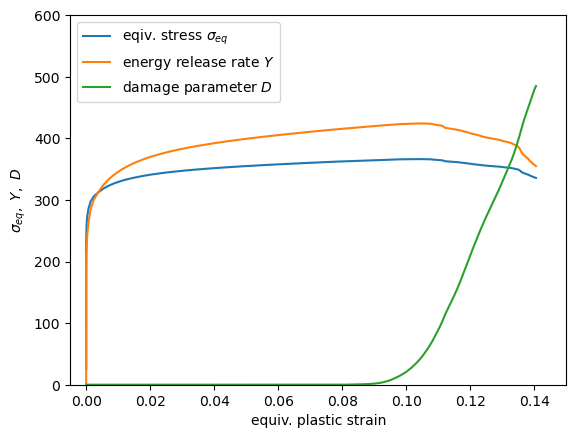

In [10]:
#Plot stress strain curve with damage energy release rate and damage
plt.plot(peeq,sigmaEq, label='eqiv. stress $\sigma_{eq}$')
plt.plot(peeq,Y*1500, label='energy release rate $Y$')
plt.plot(peeq,Damage*5.e4, label='damage parameter $D$')
plt.ylabel('$\sigma_{eq},\,\, Y,\,\, D$')
plt.xlabel('equiv. plastic strain')
plt.legend(loc='upper left')
plt.axis([-0.005, 0.15, 0, 600])
plt.show()